###  QuSpin import

A python package for diagonalization of spin$-\frac{1}{2}$ systems

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np

import pickle

### Forming the dataset

The dataset is filled with Heisenberg XXZ chain wavefunctions, where integrability is broken via next-nearest neighbor interaction, or by applying magnetic to a certain spin (middle of the chain)

In [2]:
def dataset (L, int_breaking, N, Jzz_lim, Jxy_lim, m_0, m_1, h_0, h_1, J_field):
    
    
    if int_breaking == 'next_nearest':
        lam_0 = m_0
        lam_1 = m_1
        pass
    elif int_breaking == 'field' or 'all':
        if N % 2 == 0:
            raise ValueError ('Enter odd number of spins')
        else:
            lam_0 = h_0
            lam_1 = h_1
            middle_spin = int ((N + 1) / 2)
            J_z = [[J_field, middle_spin]] # magnetic field in the middle of the chain
    
    basis = spin_basis_1d (N, pauli=False, Nup=N//2, pblock = 1) # zero magnetization and positive parity sector 
    
    dataset = {}

    dynamic = []
    
    Jxy = np.random.uniform (Jxy_lim [0], Jxy_lim [1], L)
    Jzz = np.ones (L)

    
    # loop for filling dataset with integrable systems
    for k in range (L):
        
        # dicts for single systems (keys: 'class', 'wavefunc')
        system = {} # dict for a Heisenberg XXZ systems
        
        
        J_zz  = [[Jzz [k], i, i+1] for i in range (N - 1)]
        J_xy = [[Jxy [k]  / 2, i, i+1] for i in range (N - 1)]
        J_zz_nn = [[lam_0 * Jxy [k], i, i+2] for i in range (N - 2)] # next-nearest-neighbor
        
        if int_breaking == 'next_nearest':
            static = [["+-", J_xy],["-+", J_xy],["zz", J_zz], ["zz", J_zz_nn]]  # next-nearest-neighbor
            H_XXZ = hamiltonian (static, dynamic, basis=basis, check_symm = False, dtype=np.float64)
        elif int_breaking == 'field':
            static = [["+-", J_xy],["-+", J_xy],["zz", J_zz]]
            static_field = [["z", J_z]]
            
            # compute hamiltonian for XXZ with field
            H_XXZ_0 = hamiltonian (static, dynamic, basis=basis, check_symm = False, dtype=np.float64)
            H_XXZ_1 = hamiltonian (static_field, dynamic, basis=basis, check_symm = False, dtype=np.float64)
            H_XXZ = H_XXZ_0 + lam_0*H_XXZ_1  
        
        # calculate full eigensystem
        E, V=H_XXZ.eigh()


        #ind = np.argmin (E) # choose min energy among all eigenvalues for integrable system
        ind = len (V) // 2
        
        system ['class'] = 1 # integrable class
        system ['wavefunc'] = V [ind]**2 # put the ground state into a dict of integrable systems
        
        dataset [k] = system

    

    
    # Creating Jzz, Jxy for non-integrable systems
    Jzz = np.ones (L)
    Jxy = np.random.uniform (Jxy_lim [0], Jxy_lim [1], L)
    
    # loop for filling dataset with non-integrable systems 
    
    for k in range (L):
        
        system = {}     
        
        J_zz  = [[Jzz [k], i, i+1] for i in range (N - 1)]
        J_xy = [[Jxy [k] / 2, i, i+1] for i in range (N - 1)]
        J_zz_nn = [[lam_1 * Jxy [k], i, i+2] for i in range (N - 2)] # next-nearest-neighbor
        
        if int_breaking == 'next_nearest':
            static = [["+-", J_xy],["-+", J_xy],["zz", J_zz], ["zz", J_zz_nn]]  # next-nearest-neighbor
            H_XXZ = hamiltonian (static, dynamic, basis=basis, check_symm = False, dtype=np.float64)
        elif int_breaking == 'field':
            static = [["+-", J_xy],["-+", J_xy],["zz", J_zz]]
            static_field = [["z", J_z]]
            
            # compute hamiltonian for XXZ with field
            H_XXZ_0 = hamiltonian (static, dynamic, basis=basis, check_symm = False, dtype=np.float64)
            H_XXZ_1 = hamiltonian (static_field, dynamic, basis=basis, check_symm = False, dtype=np.float64)
            H_XXZ = H_XXZ_0 + lam_1*H_XXZ_1                        
        
        
        E_nonint, V_nonint = H_XXZ.eigh ()
        
        #ind_nonint = np.argmin (E_nonint) # choose min energy among all eigenvalues for non-integrable system
        ind_nonint = len (V_nonint) // 2
        
        system ['class'] = 0 # non-integrable class
        system ['wavefunc'] = V_nonint [ind_nonint]**2 # put the ground state into a dict of non-integrable systems
        
        dataset [L + k] = system

    return dataset
        

In [122]:
def dataset1 (L, int_breaking, N, Jzz_lim, Jxy_lim, m_1, h_1, J_field):
    
    
    if int_breaking == 'next_nearest':
        lam_1 = m_1
        pass
    elif int_breaking == 'field' or 'all':
        if N % 2 == 0:
            raise ValueError ('Enter odd number of spins')
        else:
            lam_1 = h_1
            middle_spin = int ((N + 1) / 2)
            J_z = [[J_field, middle_spin]] # magnetic field in the middle of the chain
    
    basis = spin_basis_1d (N, pauli=False, Nup=N//2, pblock = 1) # zero magnetization and positive parity sector 
    
    dataset = {}

    dynamic = []
    
    Jxy = np.random.uniform (Jxy_lim [0], Jxy_lim [1], L)
    Jzz = np.ones (L)

    
    # loop for filling dataset with integrable systems
    for k in range (L):
        
        # dicts for single systems (keys: 'class', 'wavefunc')
        system = {} # dict for a Heisenberg XXZ systems
        
        
        J_zz  = [[Jzz [k], i, i+1] for i in range (N - 1)]
        J_xy = [[Jxy [k]  / 2, i, i+1] for i in range (N - 1)]
        J_zz_nn = [[lam_1 * Jxy [k], i, i+2] for i in range (N - 2)] # next-nearest-neighbor
        
        if int_breaking == 'next_nearest':
            static = [["+-", J_xy],["-+", J_xy],["zz", J_zz], ["zz", J_zz_nn]]  # next-nearest-neighbor
            H_XXZ = hamiltonian (static, dynamic, basis=basis, check_symm = False, dtype=np.float64)
        elif int_breaking == 'field':
            static = [["+-", J_xy],["-+", J_xy],["zz", J_zz]]
            static_field = [["z", J_z]]
            
            # compute hamiltonian for XXZ with field
            H_XXZ_0 = hamiltonian (static, dynamic, basis=basis, check_symm = False, dtype=np.float64)
            H_XXZ_1 = hamiltonian (static_field, dynamic, basis=basis, check_symm = False, dtype=np.float64)
            H_XXZ = H_XXZ_0 + lam_1*H_XXZ_1  
        
        # calculate full eigensystem
        E, V=H_XXZ.eigh()


        #ind = np.argmin (E) # choose min energy among all eigenvalues for integrable system
        ind = len (V) // 2
        
        system ['class'] = 0 # integrable class
        system ['wavefunc'] = V [ind]**2 # put the ground state into a dict of integrable systems
        
        dataset [k] = system
    

    return dataset
        

In [92]:
#ds = dataset (L = 200, int_breaking = 'field',
#                    N = 11, Jzz_lim = [1, 2], Jxy_lim = [1, 2],
#                    m_0 = 0., m_1 = 0.2, h_0 = 0, h_1 = 0.3, 
#                    J_field = 1)


Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

### NN training and prediction w/t sklearn

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense

In [90]:
#function to form feature vectors
def features (dataset):
    keys = list (dataset.keys ())
    X = [] # vector will be filled with ground states for all integrable and non-integrable systems
    Y = [] # vector will be filled with corresponding class
    # sequentially put ground state eigenvector and corresponding classes into X and Y
    for key in keys:
        X.append (dataset [key] ['wavefunc'])
        Y.append (dataset [key] ['class'])
    return X, Y

In [156]:
model = Sequential ()

#building input layer
model.add (Dense(700, input_shape = (868,))) #3235 if 15 #868 if 13 #236 if 11 #66 if 9 #19 if 7
#building hidden layer
model.add (Dense(700, activation = 'sigmoid'))
#building output layer
model.add (Dense(1, activation = "sigmoid"))
#compiling model
#model.load_weights ('model_weights.h5')
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [157]:
m_arr = [0.2]
h_arr = [0.2]
X_nn, Y_nn = [], []
X_im, Y_im = [], []
for i in range (len (m_arr)):
    #ds_nn = dataset (L = 200, int_breaking = 'next_nearest',
                    #N = 13, Jzz_lim = [1, 2], Jxy_lim = [0.8, 2],
                    #m_0 = 0., m_1 = m_arr [i], h_0 = 0, h_1 = 0, 
                    #J_field = 1)
    
    #X1, Y1 = features (ds_nn)
    #X_nn += X1
    #Y_nn += Y1
    
    ds_im = dataset (L = 200, int_breaking = 'field',
                    N = 13, Jzz_lim = [1, 2], Jxy_lim = [0.8, 2],
                    m_0 = 0., m_1 = 0, h_0 = 0, h_1 = h_arr [i], 
                    J_field = 1)
    
    X2, Y2 = features (ds_im)
    X_im += X2
    Y_im += Y2

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

In [95]:
np.save ('13 spins set/features_0.2_im', X_nn)
np.save ('13 spins set/labels_0.2_im', Y_nn)

In [100]:
X_nn = np.load ('13 spins set/features_0.2.npy')
Y_nn = np.load ('13 spins set/labels_0.2.npy')

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X_nn, Y_nn, test_size=0, random_state=42)

results_nn = model.fit (np.array (X_train), np.array (Y_train), epochs = 5, batch_size = 100, 
               validation_data = None);

Epoch 1/5
400/400 [==============================] - 1s 2ms/step - loss: 0.7512 - acc: 0.4650
Epoch 2/5
400/400 [==============================] - 0s 309us/step - loss: 0.7027 - acc: 0.5000
Epoch 3/5
400/400 [==============================] - 0s 332us/step - loss: 0.6820 - acc: 0.6200
Epoch 4/5
400/400 [==============================] - 0s 317us/step - loss: 0.6550 - acc: 0.5000
Epoch 5/5
400/400 [==============================] - 0s 334us/step - loss: 0.6100 - acc: 0.7125


Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

13/13 [==============================] - 0s 230us/step
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity che

13/13 [==============================] - 0s 230us/step
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity che

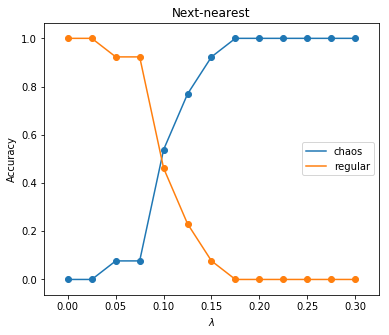

In [103]:
m_arr = [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]

#next_nearest arrays
keras_acc_nn = []
keras_acc1_nn = []

for i in range (len (m_arr)):
    ds_nn = dataset1 (L = 25, int_breaking = 'next_nearest',
                    N = 13, Jzz_lim = [1, 2], Jxy_lim = [0.8, 2], 
                      m_1 = m_arr [i], h_1 = 0, J_field = 1)
    X_nn, Y_nn = features (ds_nn)
    
    
    X_nn = X_nn [int (len (X_nn)/2) :]
    Y_nn = Y_nn [int (len (Y_nn)/2) :]
    
    Y_reg_nn = np.ones (len (Y_nn))
    
    results_nn = model.evaluate (x=np.array(X_nn), y=np.array(Y_nn), \
                            batch_size=20, verbose=1, sample_weight=None, steps=None)
    
    results1_nn = model.evaluate (x=np.array(X_nn), y=Y_reg_nn, \
                            batch_size=20, verbose=1, sample_weight=None, steps=None)
    
    keras_acc_nn.append (results_nn [1])
    keras_acc1_nn.append (results1_nn [1])
    
fig = plt.figure (figsize = (6, 5))

#plt.subplot (1, 2, 2)
plt.title ('Next-nearest')
plt.xlabel ('$\lambda$')
plt.ylabel ('Accuracy')   
plt.scatter (m_arr, keras_acc_nn, marker = 'o')
plt.plot (m_arr, keras_acc_nn, label = 'chaos')
plt.scatter (m_arr, keras_acc1_nn, marker = 'o')
plt.plot (m_arr, keras_acc1_nn, label = 'regular')
plt.legend (loc = 'best')
plt.savefig ('qchaos/spin chains/next_nearest/plots/0_5')

In [104]:
np.save ('accs_for_chains/ch_13', keras_acc_nn)
np.save ('accs_for_chains/reg_13', keras_acc1_nn)

In [105]:
ch_7, reg_7 = np.load ('accs_for_chains/ch_7.npy'), np.load ('accs_for_chains/reg_7.npy')
ch_9, reg_9 = np.load ('accs_for_chains/ch_9.npy'), np.load ('accs_for_chains/reg_9.npy')
ch_11, reg_11 = np.load ('accs_for_chains/ch_11.npy'), np.load ('accs_for_chains/reg_11.npy')
ch_13, reg_13 = np.load ('accs_for_chains/ch_13.npy'), np.load ('accs_for_chains/reg_13.npy')

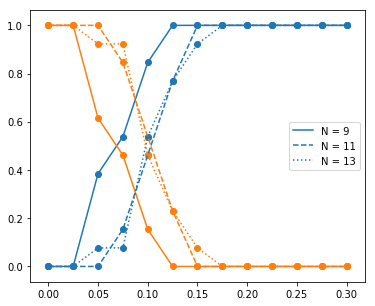

In [111]:
fig = plt.figure (figsize = (6, 5))

plt.plot (m_arr, ch_9, color = 'C0', linestyle = '-', label = 'N = 9')
plt.scatter (m_arr, ch_9, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_9, color = 'C1', linestyle = '-')
plt.scatter (m_arr, reg_9, color = 'C1', marker = 'o')

plt.plot (m_arr, ch_11, color = 'C0', linestyle = '--', label = 'N = 11')
plt.scatter (m_arr, ch_11, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_11, color = 'C1', linestyle = '--')
plt.scatter (m_arr, reg_11, color = 'C1', marker = 'o')

plt.plot (m_arr, ch_13, color = 'C0', linestyle = ':', label = 'N = 13')
plt.scatter (m_arr, ch_13, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_13, color = 'C1', linestyle = ':')
plt.scatter (m_arr, reg_13, color = 'C1', marker = 'o')

plt.legend (loc = 'best')

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X_im, Y_im, test_size=0, random_state=42)

results_im = model.fit (np.array (X_train), np.array (Y_train), epochs = 2, batch_size = 100, 
               validation_data = None);

Epoch 1/2
400/400 [==============================] - 0s 297us/step - loss: 0.5729 - acc: 0.9475
Epoch 2/2
400/400 [==============================] - 0s 279us/step - loss: 0.5071 - acc: 0.9875


Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
13/13 [==============================] - 0s 307us/step
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity che

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
13/13 [==============================] - 0s 307us/step


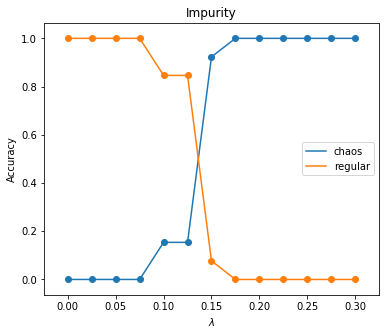

In [161]:
h_arr = [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]

#impurity arrays
keras_acc_im = []
keras_acc1_im = []

for i in range (len (h_arr)):
    ds_im = dataset1 (L = 25, int_breaking = 'field',
                    N = 13, Jzz_lim = [1, 2], Jxy_lim = [0.8, 2],
                     m_1 = 0,  h_1 = h_arr [i], 
                    J_field = 1)
    X_im, Y_im = features (ds_im)


    X_im = X_im [int (len (X_im)/2) :]
    Y_im = Y_im [int (len (Y_im)/2) :]

    Y_reg_im = np.ones (len (Y_im))

    results_im = model.evaluate (x=np.array(X_im), y=np.array(Y_im), \
                            batch_size=20, verbose=1, sample_weight=None, steps=None)

    results1_im = model.evaluate (x=np.array(X_im), y=Y_reg_im, \
                            batch_size=20, verbose=1, sample_weight=None, steps=None)

    keras_acc_im.append (results_im [1])
    keras_acc1_im.append (results1_im [1])
    
fig = plt.figure (figsize = (6, 5))

plt.title ('Impurity')
plt.xlabel ('$\lambda$')
plt.ylabel ('Accuracy')   
plt.scatter (h_arr, keras_acc_im, marker = 'o')
plt.plot (h_arr, keras_acc_im, label = 'chaos')
plt.scatter (h_arr, keras_acc1_im, marker = 'o')
plt.plot (h_arr, keras_acc1_im, label = 'regular')
plt.legend (loc = 'best')
plt.savefig ('qchaos/spin chains/impurity/0.25.png')

In [153]:
np.save ('accs_for_chains/ch_13_im', keras_acc_im)
np.save ('accs_for_chains/reg_13_im', keras_acc1_im)

In [166]:
ch_9_im, reg_9_im = np.load ('accs_for_chains/ch_9_im.npy'), np.load ('accs_for_chains/reg_9_im.npy')
ch_11_im, reg_11_im = np.load ('accs_for_chains/ch_11_im.npy'), np.load ('accs_for_chains/reg_11_im.npy')
ch_13_im, reg_13_im = np.load ('accs_for_chains/ch_13_im.npy'), np.load ('accs_for_chains/reg_13_im.npy')

In [164]:
m_arr = [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]
h_arr = [0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3]

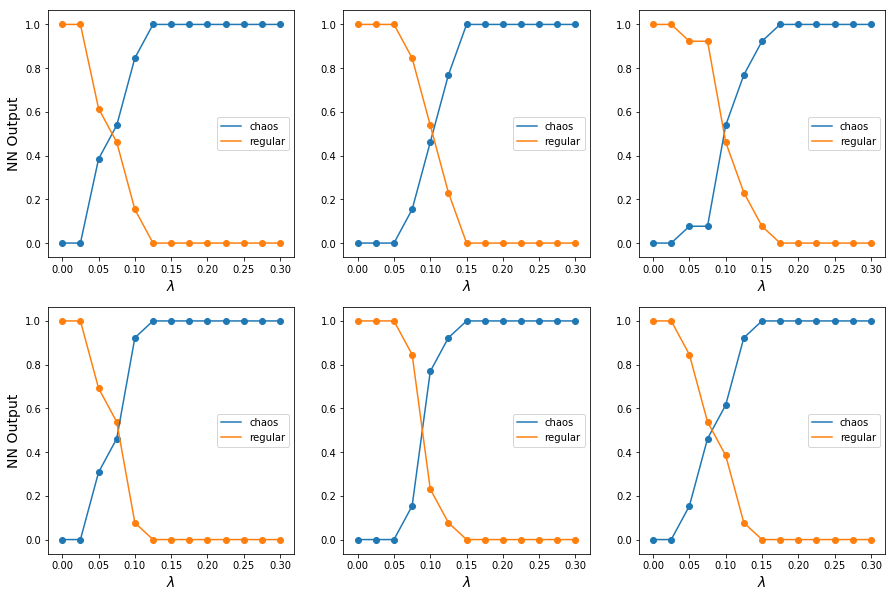

In [171]:
fig = plt.figure (figsize = (15, 10))

plt.subplot (2, 3, 1)

plt.plot (m_arr, ch_9, color = 'C0', label = 'chaos')
plt.scatter (m_arr, ch_9, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_9, color = 'C1', label = 'regular')
plt.scatter (m_arr, reg_9, color = 'C1', marker = 'o')
plt.legend (loc = 'best')
plt.ylabel ('NN Output', fontsize = 14)
plt.xlabel ('$\lambda$', fontsize = 14)

plt.subplot (2, 3, 2)

plt.plot (m_arr, ch_11, color = 'C0', label = 'chaos')
plt.scatter (m_arr, ch_11, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_11, color = 'C1', label = 'regular')
plt.scatter (m_arr, reg_11, color = 'C1', marker = 'o')
plt.legend (loc = 'best')
plt.xlabel ('$\lambda$', fontsize = 14)

plt.subplot (2, 3, 3)

plt.plot (m_arr, ch_13, color = 'C0', label = 'chaos')
plt.scatter (m_arr, ch_13, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_13, color = 'C1', label = 'regular')
plt.scatter (m_arr, reg_13, color = 'C1', marker = 'o')
plt.legend (loc = 'best')
plt.xlabel ('$\lambda$', fontsize = 14)

plt.subplot (2, 3, 4)

plt.plot (m_arr, ch_9_im, color = 'C0', label = 'chaos')
plt.scatter (m_arr, ch_9_im, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_9_im, color = 'C1', label = 'regular')
plt.scatter (m_arr, reg_9_im, color = 'C1', marker = 'o')
plt.legend (loc = 'best')
plt.ylabel ('NN Output', fontsize = 14)
plt.xlabel ('$\lambda$', fontsize = 14)

plt.subplot (2, 3, 5)

plt.plot (m_arr, ch_11_im, color = 'C0', label = 'chaos')
plt.scatter (m_arr, ch_11_im, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_11_im, color = 'C1', label = 'regular')
plt.scatter (m_arr, reg_11_im, color = 'C1', marker = 'o')
plt.legend (loc = 'best')
plt.xlabel ('$\lambda$', fontsize = 14)

plt.subplot (2, 3, 6)

plt.plot (m_arr, ch_13_im, color = 'C0', label = 'chaos')
plt.scatter (m_arr, ch_13_im, color = 'C0', marker = 'o')

plt.plot (m_arr, reg_13_im, color = 'C1', label = 'regular')
plt.scatter (m_arr, reg_13_im, color = 'C1', marker = 'o')
plt.legend (loc = 'best')
plt.xlabel ('$\lambda$', fontsize = 14)

plt.savefig ('9_11_13.png', bbox_inches = 'tight')